# Images as arrays

We have seen that images are imported as a specific data structure called an ```array```. These arrays are implemented by a package called Numpy which is foundational to the entire scientific Python ecosystem: as soon as you have to perform numerical computations, it's very likely that you will use Numpy arrays. Here we give an introduction to these arrays, specifically using images as examples.

Let us first import the Numpy package as well as scikit-image which will allow us to import images and Matplotlib with which we can look at images:

In [ ]:
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt

We import now an image from an online microscopy repository, using an url. This is fluorescence microscopy image of Saccharomyces cerevisiae with a signal accumulating in the vacuoles.

In [ ]:
image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')

In [ ]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [ ]:
type(image)

numpy.ndarray

As the type tells us, and as we can see from the output, the import function returned to us a Numpy ndarray or just array. nd stands for n-dimensional as Numpy can handle data of any dimension. The above output only shows us a fraction of the image the ```...``` indicating non-displayed values.

We have seen in the introduction that any variable in Python is more than just a variable: it has also functions (methods) and properties. This is also valid here for Numpy arrays. For example we can ask what is the shape of the array, its type and number of dimensions:

In [ ]:
image.shape

(1024, 1360)

In [ ]:
image.dtype

dtype('<u2')

In [ ]:
image.ndim

2

In [ ]:
def describe(arr, name="image"):
    arr = np.asarray(arr) # it’s a light, safe “normalize the input to ndarray” step for utility functions
    mb = arr.nbytes / (1024*1024)
    print(f"{name}: shape={arr.shape}, ndim={arr.ndim}, dtype={arr.dtype}, "
          f"min={arr.min()}, max={arr.max()}, {mb:.2f} MB")
describe(image,  "Microscopy image (native)")

Microscopy image (native): shape=(1024, 1360), ndim=2, dtype=uint16, min=192, max=4095, 2.66 MB


These numbers tell us that our array has 1024 lines and 1360 columns. In the above output we also see an indication ```dtype```. This tells us what is the type of the pixels inside the array. The variable ```image``` is an array but its content can vary: we could have floating point values, integers etc. here ```uint16``` tells us we have unsigned (no negative values) integers in 16 bit, i.e. up to $2^{16}$ different possible pixel values.

We have seen in the introduction that we could display the image using the ```imshow``` function. Let's do it here:

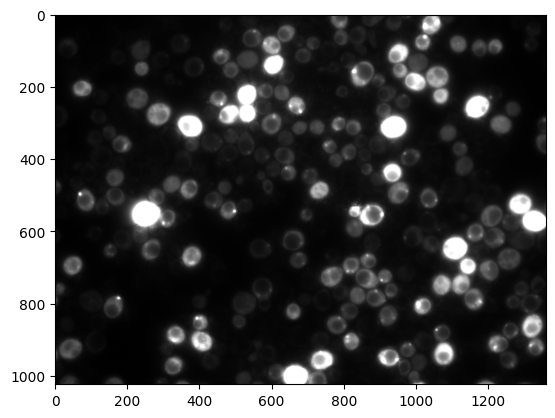

In [ ]:
plt.imshow(image, cmap='gray');

## Accessing parts of the array

Very often we don't need to access a single pixel, but an entire region. In other terms we want to **crop** the image.
Let's say we want to focus our attention on a region in the middle of the image. We can for example take the rows 400-530 and columns 400-600. Instead of just using single coordinates we can now extract that part of the image using a **range** of pixels, the range being indicated via the ```:``` symbol. Here we write:

In [ ]:
image[400:530, 400:600]

array([[375, 352, 370, ..., 470, 452, 469],
       [372, 368, 365, ..., 462, 458, 472],
       [381, 370, 359, ..., 478, 461, 480],
       ...,
       [349, 365, 346, ..., 287, 285, 290],
       [333, 349, 340, ..., 288, 276, 275],
       [355, 351, 337, ..., 282, 274, 267]], dtype=uint16)

We can store this new smaller array into a new variable and then plot the corpped image:

(**Note that we additionally use here the ```copy``` method. This ensures that whatever modification we make to the cropped version doesn't affect the original image!**.)

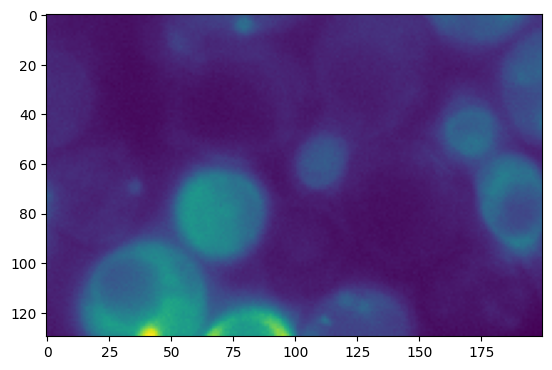

In [ ]:
cropped = image[400:530, 400:600].copy()
plt.imshow(cropped);

If instead of selecting both rows and columns we only want to select a range of rows and take **all** columns and check their shape, we can just use ```:``` alone:

In [ ]:
image[400:530, :].shape

(130, 1360)

## Other ways of creating arrays

In addition to create arrays by importing them, we can also generate them using Numpy functions. This can be useful to initialize some array that we can then re-use later.

There are many different types of arrays that we can create. For example we can create arrays that only contain ```0```s or ```1```s and have a certain shape, e.g. 5 rows and 3 columns, using the ```np.zeros()``` and ```np.ones()``` functions:

In [ ]:
np.zeros(shape=(5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.ones(shape=(5,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

We can also create 1D arrays (only one row) with values regularly distributed. For example we can create an array with numbers from a given ```start``` value to a ```stop``` value in a certain ```step``` size:

In [ ]:
np.arange(start=4, stop=12, step=2)

array([ 4,  6,  8, 10])

In addition the ```random``` submodule of Numpy allows us to create arrays with numbers taken from a given distribution. For example we can take numbers from a Poisson distribution of parameter ```lam```. Remember that to access a submodule we use ```np.submodule.function_name```:

In [ ]:
np.random.poisson(lam=3, size=(3,5))

array([[3, 1, 1, 4, 8],
       [3, 3, 6, 0, 6],
       [1, 3, 4, 3, 2]])

### Numpy functions
In addition to simple arithmetic, we can apply **entire functions** to these arrays. In particular Numpy has a wide range of functions that take arrays as inputs. For example, we can take the cosine of each element in an image using the ```np.cos()``` function:

In [ ]:
np.cos(cropped)


array([[-0.40805453,  0.98998827,  0.7597075 , ...,  0.32583833,
         0.925159  , -0.61949694],
       [ 0.27513435, -0.9074341 ,  0.8390551 , ..., -0.982774  ,
         0.7822497 ,  0.7240764 ],
       [-0.64689636,  0.7597075 ,  0.6536208 , ...,  0.88795507,
        -0.6865085 , -0.7877331 ],
       ...,
       [-0.96016186,  0.8390551 ,  0.91111785, ..., -0.44011596,
        -0.63334256,  0.5624289 ],
       [ 0.9999611 , -0.96016186,  0.75966835, ...,  0.51779556,
         0.89598435,  0.11041721],
       [-1.        ,  0.65366644, -0.66029406, ...,  0.73621315,
        -0.776667  , -0.99937433]], dtype=float32)

We won't create an exhaustive list of functions here. If you need a specific one the simplest is just to Google using "numpy name_of_your_operation" and the corresponding documentation should appear as first link.

Above we have used a function that takes an array as input and returns again an array (of the same shape) as output. However there are functions that *summarize* the array and that return for example a single number. For example we can find the maximum value in the array:

In [ ]:
max_np = np.max(cropped)   # same as cropped.max()
min_np = np.min(cropped)   # same as cropped.min()
mean_np = np.mean(cropped) # same as cropped.mean()
std_np = np.std(cropped)   # same as cropped.std()
print(f"Max: {max_np}, Min: {min_np}, Mean: {mean_np}, Standard deviation: {std_np}")

Max: 1568, Min: 267, Mean: 472.93142307692307, Standard deviation: 172.53921546746614


### Operations between arrays

Above we have only seen operations that use a *single* array and that either modified the array or calculated some statistic. But we can also **combine** arrays in different ways, for example we can add two arrays. Again the operation happens **element-wise** and because of this we have to ensure that the two arrays have the **same dimensions**. If they don't Numpy doesn't know what to do with pixels that don't have an equivalent in the other array.

As we are studying image processing, let's simulate noise in our image. We will take our ```cropped``` and add to it some noise (this is commonly done to test algorithms in degraded conditions). Let's use again Poisson noise. Now we need to make sure that we create a noise-image that has the correct dimensions ```(cropped.shape)```.

In [ ]:
noise_image = np.random.poisson(lam=3, size=cropped.shape)

Now we simply add the ```cropped``` image and the ```noise_image```:

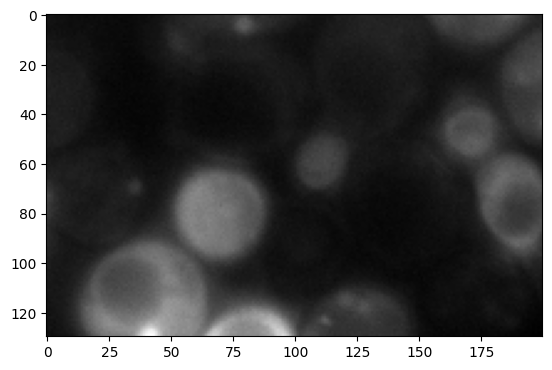

In [ ]:
corrupted = cropped + 100*noise_image
plt.imshow(cropped, cmap='gray');

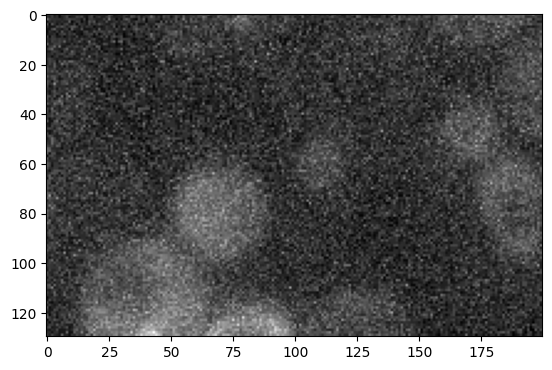

In [ ]:
plt.imshow(corrupted, cmap='gray');

## Logical operations and indexing

The last important topic concerns logical operations such as $a > 3$. In basic Python we can use these kind of statements:

In [ ]:
cropped > 450

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

We see that the output is again a Numpy array and that it is filled with ```True``` and ```False``` values: we have a **boolean array**. Again the comparison here was done **element wise**: each pixel was compared to the value 500 and the result stored in a new array. As with a simple number we can now save this **boolean array** as a variable.

As we are working with an image, what we have just done here is essentially **thresholding**: we created a binary image where pixels say ```True``` above the intensity threshold and ```False``` otherwise. We can actually plot the result:

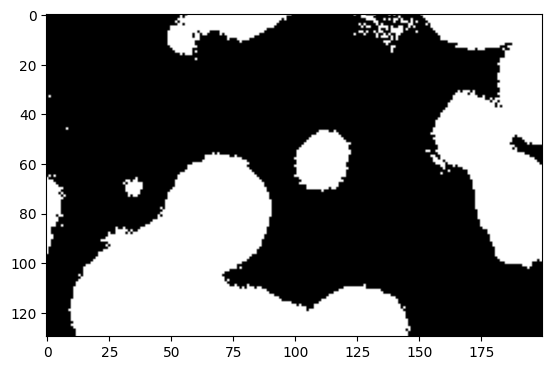

In [ ]:
array_bool = cropped > 450
plt.imshow(array_bool, cmap='gray')

One very important operation that we can use now is to combine the image with the boolean array **to extract only the ```True``` values** from the image. You can imagine of using the logical array as a mask, superposing it onto the image and extracting only the pixel that are visible through the white regions. The drawing below explains this concept:

In [ ]:
from IPython.display import Image
Image(url='https://github.com/guiwitz/ISDAwPython_day2/raw/master/images/logical_indexing.jpeg',width=700)

This operation is performed by passing the boolean array (the indexing one) to the image in square parentheses:

In [ ]:
cropped[array_bool]

array([468, 466, 465, ..., 496, 488, 472], dtype=uint16)

As you can see, the output is just 1D array, a list of numbers. Imagine that you want to estimate the average fluorescent intensity in those structures. This is exactly how we would proceed:
1. Find the objects of interest. Here we did it by (bad) manual thresholding
2. Find which pixels belong to these objects. This is done here using the above **logical indexing** ```cropped[array_bool]```
3. Finally compute the average of those values. This can simply be achieved by taking the ```mean``` of the above array:

In [ ]:
extracted_pixels = cropped[array_bool]
extracted_pixels.mean()

np.float64(658.8238455632335)

# More on images

In the previous chapter we have seen how images can be imported in Python as Numpy arrays and what kind of operations we can do with these arrays. Here we give more information on some technical aspects of working with images.

## Displaying images

There are several libraries that allow you to display images. Here we mainly use Matplotlib which you can use for other purposes and which is also used as basis for other libraries.

And we have also seen how we can display an image with ```imshow```.

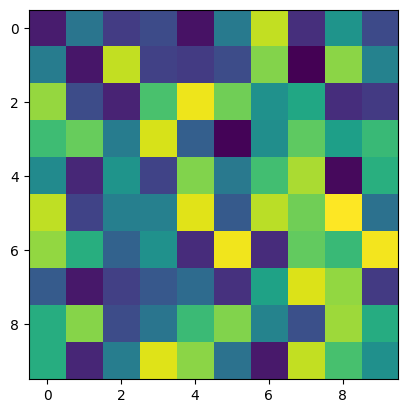

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.random.randint(0,255,(10,10)));

The above way of creating a figure is a sort of shortcut. The "correct" way of creating a figure that you should use if you want more control over it is:

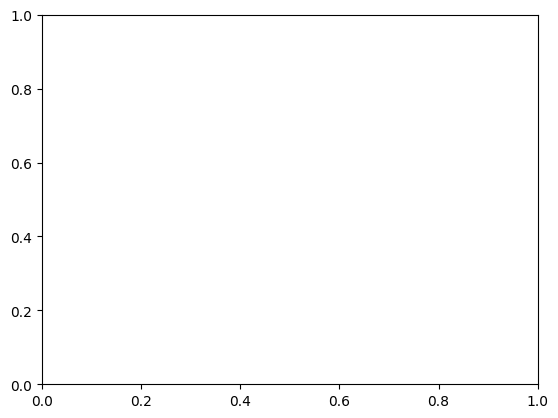

In [ ]:
fig, ax = plt.subplots()

As you can see, the above commmand ```plt.subplots()``` creates an empty figure and returns two variables ```fig``` and ```ax```. ```fig``` is the *entire figure* which potentially could contain multiple parts. The ```ax``` variable represents the plot itself. Now instead of using ```plt.imshow``` we can use ```ax.imshow``` and finely control the rendering:

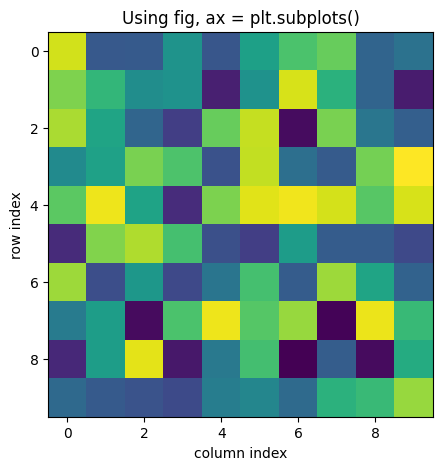

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(np.random.randint(0,255,(10,10)));
ax.set_xlabel("column index")
ax.set_ylabel("row index")
ax.set_title("Using fig, ax = plt.subplots()")
plt.show()

Above we have used:
- an optional parameter ```figsize``` with which we can set the size of the figure
- added axis labels and title using the ```set_xlabel```, ```set_ylabel``` and ```set_title``` methods on ```ax```

You can decide on the formatting of your plots in the tiniest detail with Matplotlib. In this course, we don't explore all these possibilities but if you are interested you can find more information on online documentations. The only thing that we will use is sometimes the ```figsize``` option to adjust the figure size.

## Multi-dimensional images

When learning about images as arrays, we used an image that was imported as a 2D array:

In [ ]:
import skimage.io
image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')
image.shape

(1024, 1360)

However, very often in microscopy we are using multi-dimensional images: time-lapses, multi-channel, volumes etc. In those cases the imported arrays are not 2 but N-dimensional. Let's for example import the following image:

In [ ]:
image_rgb = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')
image_rgb.shape

(2048, 2048, 3)

The shape of this image has now three values: rows, columns and an additional one. Here this last channel corresponds the multiple channels. We can plot the image to confirm this:

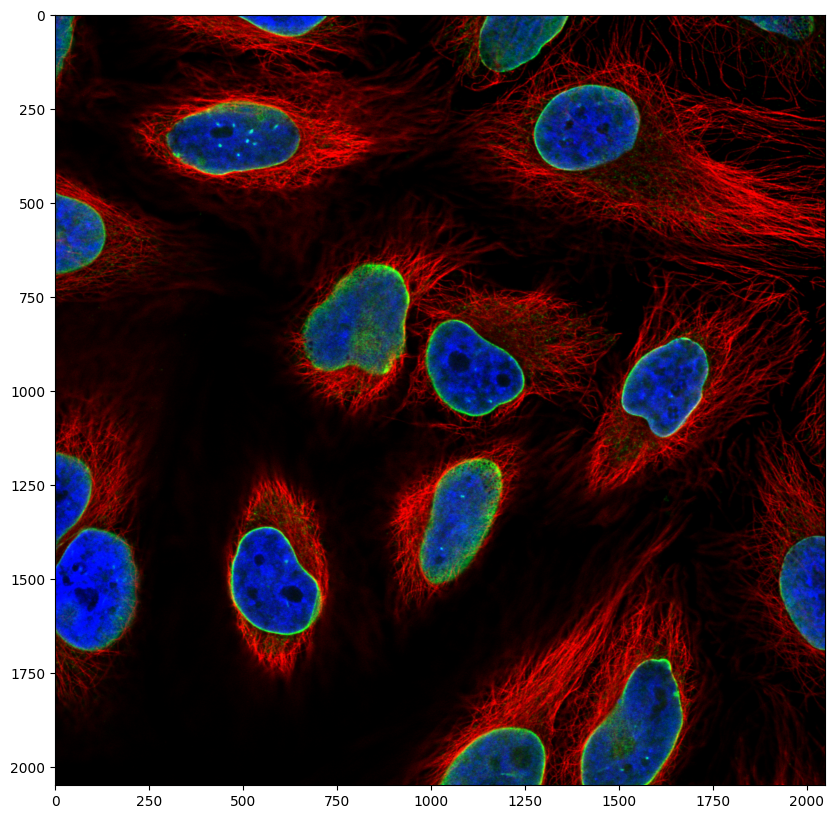

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image_rgb);

### Splitting channels

When using other software such as ImageJ, a very common first step in a processing pipeline is to split the image into separate channels so that they can be processed individually. There is no "splitting function" here, but since we are dealing with an array, we can simply **slice** the array and select only one of the channels. If we want the first channel we need:
- all rows of the first dimension: ```:```
- all columns of the second dimension: ```:```
- the first channel of the third dimension: ```0```

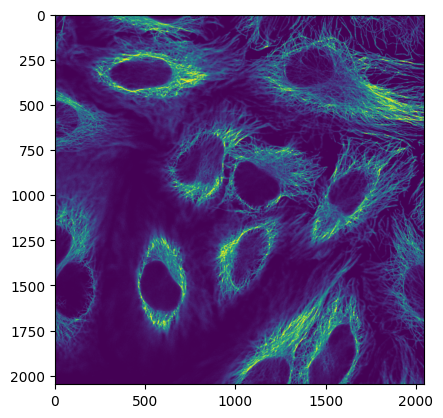

In [ ]:
image_channel1 = image_rgb[:, : , 0]
plt.imshow(image_channel1);

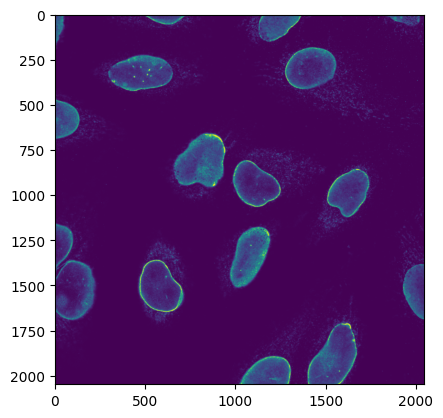

In [ ]:
image_channel2 = image_rgb[:, : , 1]
plt.imshow(image_channel2);

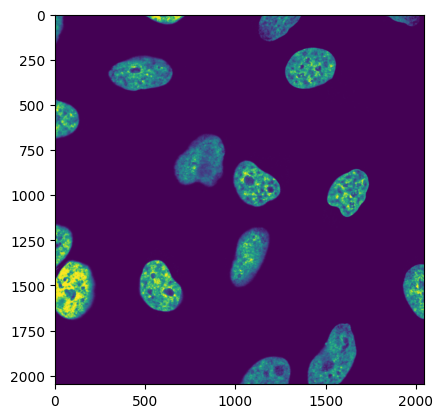

In [ ]:
image_channel3 = image_rgb[:, : , 2]
plt.imshow(image_channel3);

It can be that you will work with even higher-dimensional images. For example if you have a volume acquired in multiple channels you will have four dimensions: rows, columns, planes, channels.

If the standard scikit-image importer is not sufficient because you are working with an unrecognized format we recommend to have a look at the [AICSImageIO](https://allencellmodeling.github.io/aicsimageio/) package. It is not as straightforward to use as the simple ```imread``` but more powerful.

## Image histogram

Another very common task is to look at the distribution of pixel intensities in the form of a histogram, i.e. count how many times each pixel value (or range) appears in an image and display it a a bar. This allows to get a quick estimate of the intensities present in an image and to check for problems like saturation.

We have already seen that we could use Matplotlib's ```imshow``` function to display an image. Now we look at a second plotting function from that library which generates such a histogram ```plt.hist()```. We want to compute the histogram on **all pixels** and for that we cannot use our 2D image as input. We first need to **flatten** the image into one long series of number. This can be done with the ```ravel()``` method of the array:

In [ ]:
image_channel1.ravel().shape

(4194304,)

Now we can pass this unfolded version of the image to the histogram function:

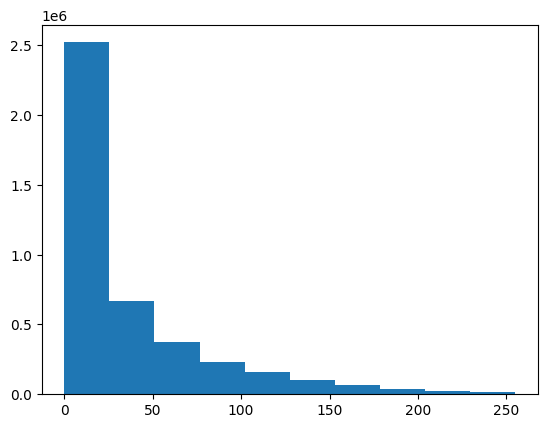

In [ ]:
plt.hist(image_channel1.ravel());

Here we see that we have a lot of background pixels (large bin at low values) but we luckily don't observe saturation, which would appear as one large bin on the right.

## Image types

In the above historgram we see that our maximum value is around 250, actually it is:

In [ ]:
img_max = image_channel1.max()
img_dtype = image_channel1.dtype
print(f"Max value: {img_max} and image dtype: {img_dtype}")

Max value: 255 and image dtype: uint8


In [ ]:
image_channel1[0:3, 0:3]

array([[13, 15, 22],
       [22, 29, 36],
       [14, 22, 25]], dtype=uint8)

In [ ]:
image_channel1[0:3, 0:3] - 30

array([[239, 241, 248],
       [248, 255,   6],
       [240, 248, 251]], dtype=uint8)

Something strange happened: for example the original value 36 has indeed become 6, but the value 13 has become 239 ?!

The type of our array is 8 bit. This means that it can **only** take values between 0-255. So when we compute 13-30, we **cannot obtain a negative value**. What happens is that instead we subtract first 13, reach the value 0, and then essentially end-up at the other end of the possible range of values which which is 255 and then remove additionally 17 and end-up with the value 239.

We can see the strange result of such an operation by plotting:

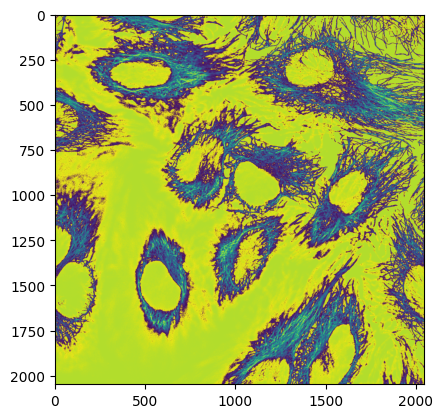

In [ ]:
plt.imshow(image_channel1-30);

What can we do to fix this problem ? We have to change the type of our image so that it can accomodate this mathematical operation. For example we can turn it into a float image. For this we use the ```astype``` function:

In [ ]:
image_channel1_float = image_channel1.astype(np.float16)
image_channel1_float[0:3, 0:3]

array([[13., 15., 22.],
       [22., 29., 36.],
       [14., 22., 25.]], dtype=float16)

In [ ]:
image_channel1_float[0:3, 0:3] - 30

array([[-17., -15.,  -8.],
       [ -8.,  -1.,   6.],
       [-16.,  -8.,  -5.]], dtype=float16)